In [ ]:
import itertools
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
pd.options.mode.chained_assignment = None

## Task1

Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.

In [ ]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
for i in ['sex', 'smoker', 'region']:
    print(df[i].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1337, 7)

In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Task 2

Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.

h0 - средние всех групп равны.  
h1 - хотя бы одно среднее значение отличается.  

In [ ]:
southwest_bmi = df[df['region'] == 'southwest']['bmi']
southeast_bmi = df[df['region'] == 'southeast']['bmi']
northwest_bmi = df[df['region'] == 'northwest']['bmi']
northeast_bmi = df[df['region'] == 'northeast']['bmi']

stats.f_oneway(southwest_bmi, southeast_bmi, northwest_bmi, northeast_bmi)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. Фактор региона оказывает статистически значимое влияние на индекс массы.

## Task 3

Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.

In [ ]:
model = ols('bmi ~ region', df).fit()
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
region,4057.813904,3.0,39.485939,1.908729e-24
Residual,45662.381091,1333.0,NaN,NaN


## Task 4

С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.

In [ ]:
bmi_regions = [('southwest_bmi', southwest_bmi), 
                ('southeast_bmi', southeast_bmi), 
                ('northwest_bmi', northwest_bmi), 
                ('northeast_bmi', northeast_bmi)]

In [ ]:
bonferroni = 0.05 / 6

for idx_1 in range(len(bmi_regions) - 1):
    for idx_2 in range(idx_1 + 1, len(bmi_regions)):
        ttest_pvalue = stats.ttest_ind(bmi_regions[idx_1][1], bmi_regions[idx_2][1])[1]
        ans = 'Принимается' if ttest_pvalue > bonferroni else 'Отклоняется'
        print((f'{bmi_regions[idx_1][0]} and {bmi_regions[idx_2][0]}', ttest_pvalue, ans))

('southwest_bmi and southeast_bmi', 5.4374009639680636e-09, 'Отклоняется')
('southwest_bmi and northwest_bmi', 0.0010577505931067947, 'Отклоняется')
('southwest_bmi and northeast_bmi', 0.0019086161671573072, 'Отклоняется')
('southeast_bmi and northwest_bmi', 2.7504255547794223e-19, 'Отклоняется')
('southeast_bmi and northeast_bmi', 1.186014937424813e-17, 'Отклоняется')
('northwest_bmi and northeast_bmi', 0.9598300701853016, 'Принимается')


различия средних значений индекса массы тела нет только у двух регионов: northwest и northeast

## Task 5

Выполнить пост-хок тесты Тьюки и построить график.

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.022,0.9,-1.1609,1.2048,False
northeast,southeast,4.1825,0.001,3.0326,5.3324,True
northeast,southwest,1.4231,0.0107,0.2412,2.605,True
northwest,southeast,4.1605,0.001,3.0106,5.3104,True
northwest,southwest,1.4011,0.0125,0.2192,2.5831,True
southeast,southwest,-2.7594,0.001,-3.9083,-1.6104,True


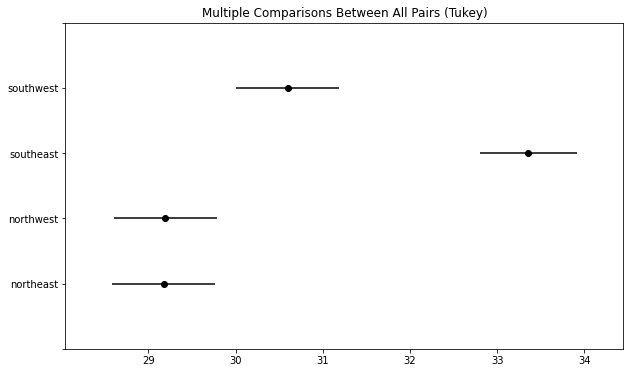

In [ ]:
tukey = pairwise_tukeyhsd(endog=df['bmi'], groups=df['region'])
tukey.plot_simultaneous()
tukey.summary()

## Task 6

Выполнить двухфакторный ANOVA тест, чтобы проверить влияние
региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.

In [ ]:
model = ols('bmi ~ C(sex) + C(region) + C(sex):C(region)', df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(sex),85.359929,1.0,2.498643,1.141824e-01
C(region),4036.141807,3.0,39.381780,2.215903e-24
C(sex):C(region),175.040197,3.0,1.707917,1.635099e-01
Residual,45401.980965,1329.0,NaN,NaN


значение фактора региона меньше 0,05, это означает, что фактор оказывает статистически значимое влияние на bmi. значение фактора пола и взаимодействия выше 0,05, значит они не оказывают влияние.

## Task 7

Выполнить пост-хок тесты Тьюки и построить график.


group1,group2,meandiff,p-adj,lower,upper,reject
female / northeast,female / northwest,-0.0464,0.9,-2.0149,1.9222,False
female / northeast,female / southeast,3.3469,0.001,1.4093,5.2846,True
female / northeast,female / southwest,0.7362,0.9,-1.2384,2.7107,False
female / northeast,male / northeast,-0.2998,0.9,-2.2713,1.6717,False
female / northeast,male / northwest,-0.2133,0.9,-2.194,1.7673,False
female / northeast,male / southeast,4.6657,0.001,2.7627,6.5686,True
female / northeast,male / southwest,1.8051,0.101,-0.1664,3.7767,False
female / northwest,female / southeast,3.3933,0.001,1.4649,5.3217,True
female / northwest,female / southwest,0.7825,0.9,-1.1829,2.748,False
female / northwest,male / northeast,-0.2534,0.9,-2.2158,1.709,False


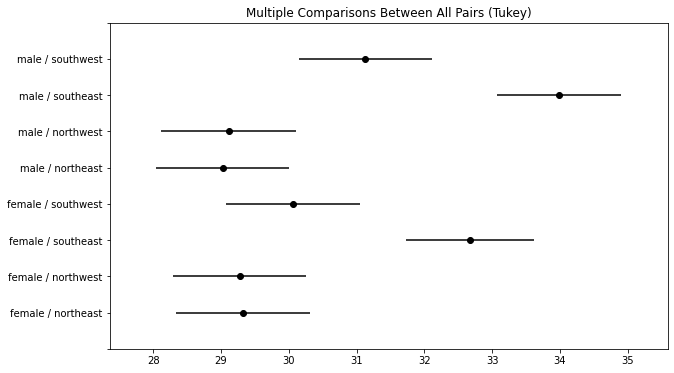

In [ ]:
df['combination'] = df['sex'] + " / " + df['region']

tukey = pairwise_tukeyhsd(endog=df['bmi'], groups=df['combination'])
tukey.plot_simultaneous()
tukey.summary()